In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

## Decision Tree

#### 모델 생성

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
#피쳐 선택
#iris.data - 열의 개수가 4개인 2차원 배열
# print(iris.feature_names)
X = iris.data
y = iris.target

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42) 
# max_depth : 트리의 깊이
# max_depth 가 크면 정확한 분류를 할 가능성은 높지만, 시간이 많이 걸리고 overfitting 될 수 있따.
# 트리 모델은 트리를 한 개 생성하는 것이 아니고 여러 개 생성
# 각 트리가 동일한 데이터를 가지고 훈련해야하므로 random_state를 고정시켜야 합니다.
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

#### 예측

In [30]:
result = tree_clf.predict([[5.1, 3.5, 1.4, 0.2]])
print(result)

[0]


#### 트리모델 시각화

In [9]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
   ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


In [40]:
!pip install pygraphviz

  Using cached pygraphviz-1.12.tar.gz (104 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [55 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-311\pygraphviz
  creating build\lib.win-amd64-cpython-311\pygraphviz\tests
  copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-311\pygraphviz\tests
  copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-cpython-311\pygraphviz\tests
  copying pygraphviz\tests\test_close.py -> build\lib.win-amd64-cpython-311\pygraphviz\tests
  co

In [12]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded=True,
    filled=True
)

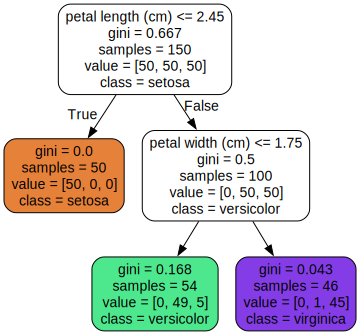

In [31]:
import os 
os.environ['PATH'] += os.pathsep + "C:\Program Files\Graphviz\bin"
with open('iris_tree.dot') as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src

In [26]:
# 이미지 파일로 저장
import pygraphviz as pga
from IPython.display import Image
graph = pga.AGraph('iris_tree.dot')
graph.draw('iris_tree.png', prog = 'dot')
Image('iris_tree.png')

ModuleNotFoundError: No module named 'pygraphviz'

In [32]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 파라미터 모음 만들기
params = {
    'max_depth' : [2, 4, 6, 8, 12, 16],
    'min_samples_split' : [2, 4, 8, 10]
}

grid_cv = GridSearchCV(tree_clf, param_grid = params, scoring ='accuracy',
                      cv = 5, verbose = 1)
grid_cv.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 12, 16],
                         'min_samples_split': [2, 4, 8, 10]},
             scoring='accuracy', verbose=1)

In [33]:
# 가장 좋은 파라미터 찾기
print('가장 좋은 파라미터', grid_cv.best_params_)
print('가장 좋은 정확도', grid_cv.best_score_)

가장 좋은 파라미터 {'max_depth': 4, 'min_samples_split': 8}
가장 좋은 정확도 0.9666666666666668


In [34]:
# 피져의 중요도
best_iris_clf = grid_cv.best_estimator_
iris_importances = pd.Series(best_iris_clf.feature_importances_,
                            index = iris.feature_names)
print(iris_importances)

sepal length (cm)    0.000
sepal width (cm)     0.000
petal length (cm)    0.574
petal width (cm)     0.426
dtype: float64


In [37]:
iris_top3 = iris_importances.sort_values(ascending = False)[:3]
print(iris_top3)

petal length (cm)    0.574
petal width (cm)     0.426
sepal length (cm)    0.000
dtype: float64


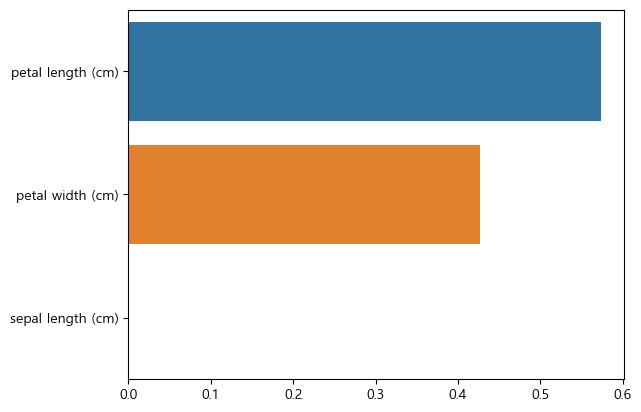

In [41]:
sns.barplot(x = iris_top3, y = iris_top3.index)
plt.show()

## 회귀

In [50]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

import seaborn as sns

import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해
# np.random.seed(42)

In [ ]:
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
	path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
	print("그림 저장:", fig_id)
	if tight_layout:
		plt.tight_layout()
	plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
	rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
	font_name = font_manager.FontProperties(fname=path).get_name()
	rc('font', family=font_name)

### 회귀의 평가 지표 설정

In [48]:
# 샘플 데이터 생성
from sklearn.datasets import make_regression

#m_informative 는 독립 변수 중에서 종속 변수와 상관 관계를 갖는 개수
features, target = make_regression(n_samples =100, n_features = 3, n_informative =3,
                                 n_targets = 1, noise = 50,
                                 coef = False, random_state = 42)
# 선형 회귀 모델 생성
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

# 교차 검증을 수행
from sklearn.model_selection import cross_val_score
print(cross_val_score(ols, features, target, scoring='neg_mean_squared_error'))
print(cross_val_score(ols, features, target, scoring='r2'))

[-2491.789 -3693.986 -2109.789 -2192.169 -3187.279]
[0.583 0.675 0.812 0.708 0.476]


## 선형 회귀 훈련 방식

### 행렬 연산을 위한 정규 방정식

In [55]:
# 샘플 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 3* X + 4 + np.random.randn(100, 1)
#원래 수식은 3 *X + 4  인데 뒤에 잡음을 섞음

# 피쳐 데이터를 앞에 1인 열을 추가해서 2차원 배열로 수정
X_b = np.c_[np.ones((100, 1)), X]
print(X_b.shape)

# 헹렬 연산을 이용해서 정규 방정식을 구현해서 회귀 계수를 찾기
result = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# 첫 번째 나오는 숫자가 intercept, 두 번째 숫자가 slope
print(result)


(100, 2)
[[4.252]
 [2.959]]


In [57]:
# 정규 방정식을 이용한 예측
X_new = np.array([[0],[2]])

# 앞에 1을 추가
X_new_b = np.c_[np.ones((2,1)), X_new]

# 예측
y_predict = X_new_b.dot(result)
print(y_predict)

[[ 4.252]
 [10.17 ]]


In [59]:
# sklearn 을 이용한 단순 선형 회귀
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.252]), array([[2.959]]))

In [61]:
# sklearn을 이용한 예측
y_predict = lin_reg.predict(X_new)
print(y_predict)

[[ 4.252]
 [10.17 ]]


In [63]:
# 최소 자승법을 이용한 정규 방정식
best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
print(best_svd)

[[4.252]
 [2.959]]


## 다변량 선형 회귀

In [65]:
# 데이터 읽어오기
score = pd.read_csv('data_ML/score.csv')
# score.head
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     10 non-null     object
 1   score    10 non-null     int64 
 2   iq       10 non-null     int64 
 3   academy  10 non-null     int64 
 4   game     10 non-null     int64 
 5   tv       10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 612.0+ bytes


In [70]:
# 다변량 선형 회귀 수행
import statsmodels.formula.api as sm

# 훈련한 후 결과 리턴
result = sm.ols(formula = 'score ~ iq + academy + game + tv', data = score).fit()
# print(result)

print('절편과 기울기 : ', result.params)
print('결정 계수 : ', result.rsquared)
print('유의 확률 : ', result.pvalues)

# 결정 계수는  0.96 으로 상당히 높은데 각 피쳐의 유의확률도 높은 편
# 유의 확률이 높다면 귀무 가설 기각 불가능, 즉 각 피쳐는 유의하지 않다는 결론인데
# 모든 피쳐를 다 사용했음에도 r^2 가 높게 나왔다... 흐음 의심이 된다
# 이런 경우에 '다중공선성' 이 의심된다고 한다.

절편과 기울기 :  Intercept    23.299
iq            0.468
academy       0.718
game         -0.839
tv           -1.385
dtype: float64
결정 계수 :  0.9608351062148871
유의 확률 :  Intercept    0.118
iq           0.003
academy      0.534
game         0.131
tv           0.184
dtype: float64


In [72]:
# 상관 계수확인
X = score.drop(['name', 'score'], axis = 1)
print(X.corr())
# iq와 academy 그리고 tv사이에 상관계수가 높은 편

            iq  academy   game     tv
iq       1.000    0.601 -0.104 -0.678
academy  0.601    1.000 -0.311 -0.847
game    -0.104   -0.311  1.000  0.244
tv      -0.678   -0.847  0.244  1.000


In [73]:
# 분산 팽창 요인 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['분산팽창요인'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

# iq가 진짜 높게 나온다

   분산팽창요인 features
0  31.162       iq
1  13.444  academy
2   3.055     game
3   7.784       tv


In [74]:
X = score.drop(['name', 'score', 'iq'], axis = 1)

vif = pd.DataFrame()
vif['분산팽창요인'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

# iq 가 문제 였넹

   분산팽창요인 features
0   1.528  academy
1   2.655     game
2   2.211       tv


In [75]:
# 훈련한 후 결과 리턴 - iq 제거
result = sm.ols(formula = 'score ~ academy + game + tv', data = score).fit()
# print(result)

print('절편과 기울기 : ', result.params)
print('결정 계수 : ', result.rsquared)
print('유의 확률 : ', result.pvalues)
# 이전에 비해서 결정 계수의 값은 조금 나빠졌지만 유의 확률은
# 많이 감소했습니다.
#VIF 가 높았던 iq 그리고 academy를 하나씩 빼면서 확인 

절편과 기울기 :  Intercept    84.551
academy       1.213
game         -0.589
tv           -3.255
dtype: float64
결정 계수 :  0.7464068030954777
유의 확률 :  Intercept    8.366e-05
academy      6.436e-01
game         6.032e-01
tv           1.406e-01
dtype: float64


In [76]:
# 훈련한 후 결과 리턴 - academy 제거
result = sm.ols(formula = 'score ~ iq + game + tv', data = score).fit()
# print(result)

print('절편과 기울기 : ', result.params)
print('결정 계수 : ', result.rsquared)
print('유의 확률 : ', result.pvalues)

# 이게 제일 성능이 좋다!
# VIF 가 제일 높은걸 무조건 빼는게 아니라 하나씩 다 해봐서
# 제일 성능이 좋은 걸 뽑자

절편과 기울기 :  Intercept    25.047
iq            0.474
game         -0.904
tv           -1.823
dtype: float64
결정 계수 :  0.957351876527423
유의 확률 :  Intercept    0.072
iq           0.001
game         0.082
tv           0.021
dtype: float64


## 다중 선형 회귀

### 다항식 피처 생성

In [78]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(4).reshape(2,2)
print(X)

# 2차 다항 피처를 생성
poly = PolynomialFeatures(degree = 2)
result = poly.fit_transform(X)

# 첫 번째 데이터는 무조건 1, 두 번째와 세 번째 데이터는 그대로
# 네 번째와 여섯 번째 데이터는 제곱한 값, 다섯 번째 데이터는 곱한 값
print(result)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
# 비선형의 데이터 형태에서 찾을 수 있는 관계를 파악하기 위해서 
# 피처의 개수를 늘릴 때 사용

### 다항 회귀 적용

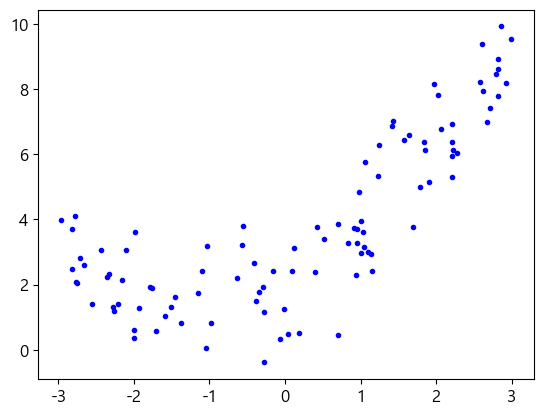

In [80]:
# 샘플 데이터 생성

m = 100
X = 6 * np.random.rand(m, 1) -3
# 0.5 * X 의 제곱 + X +2
#np.random.randn(m, 1) 은 잡음

y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# 시각화
plt.plot(X, y, 'b.')
plt.show()

[3.648] [[1.086]]


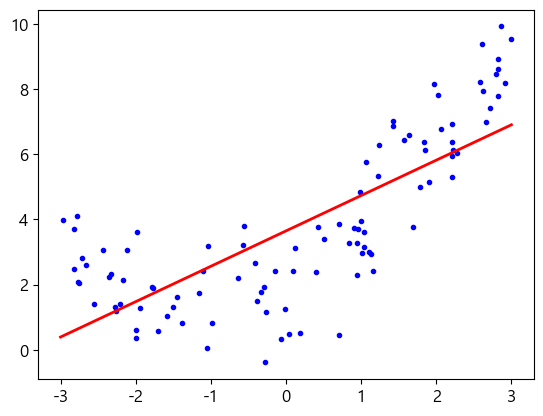

In [83]:
# 선형 회귀 적용
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

# 예측 해서 시각화
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = lin_reg.predict(X_new)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth = 2)
plt.show()

[2.441] [[ 3.276e-03  1.207e-02  7.288e-03  1.583e-02  1.202e-02  2.424e-02
   1.918e-02  3.517e-02  3.055e-02  4.245e-02  4.102e-02  3.513e-02
   3.930e-02  4.919e-03  1.192e-02 -3.060e-02 -2.987e-02 -1.854e-02
  -2.511e-02  3.584e-02  3.969e-02 -1.941e-02 -2.044e-02  5.649e-03
   5.797e-03 -1.007e-03 -1.018e-03  1.137e-04  1.141e-04 -7.963e-06
  -7.971e-06  3.165e-07  3.173e-07 -5.468e-09 -5.510e-09]]


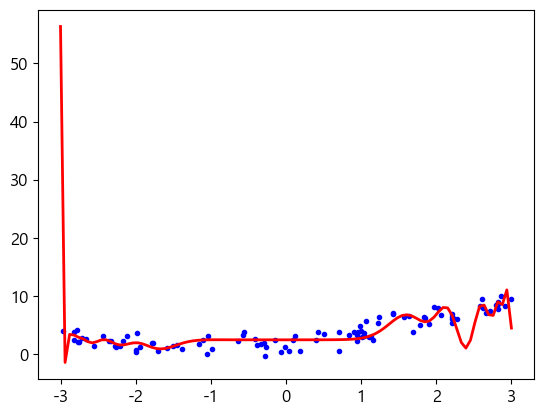

In [89]:
# 다항식을 추가한 데이터를 생성
# 차수가 높아지면 잔차를 거의 없앨 수 있지만 무작정 늘리는 것은
# 훈련시간을 느리게 하고 과대 적합의 문제가 발생할 수 있음
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

# 선형 회귀를 수행
# 알아서 다항식의 형태로 만들어 줍니다.
# sklearn 의 선형 회귀는 다항의 특성도 자동으로 학습합니다.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

# 예측 해서 시각화 - 더 잘 fit한다, 잔차가 줄어드는 것을 확인
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth = 2)
plt.show()